## Introduction
In workspaces like this one, you will be able to practice visualization techniques you've seen in the course materials. In this particular Jupyter Notebook, you'll practice creating single-variable plots for categorical data.

The cells where you are expected to contribute, are highlighted with **TO DO** markdown. 

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# The `solutions_univ.py` is a Python file available in the Notebook server that contains solution to the TO DO tasks.
# The solution to each task is present in a separate function in the `solutions_univ.py` file. 
# Do not refer to the file untill you attempt to write code yourself. 
from solutions_univ import bar_chart_solution_1, bar_chart_solution_2

## About the Dataset
In this workspace, you'll be working with the dataset comprised of attributes of creatures in the video game series Pokémon. The data was assembled from the database of information found in this [GitHub repository](https://github.com/veekun/pokedex/tree/master/pokedex/data/csv).

In [2]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


### **TO DO Task 1** 
1. Explore the `pokemon` dataframe, and try to understand the significance of each of its column.
2. There have been quite a few Pokémon introduced over the series' history. Display the count of Pokémon introduced in each generation? Create a _bar chart_ of these frequencies using the 'generation_id' column.

In [3]:
# YOUR CODE HERE
print(pokemon.shape)
pokemon.info()

(807, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               807 non-null    int64  
 1   species          807 non-null    object 
 2   generation_id    807 non-null    int64  
 3   height           807 non-null    float64
 4   weight           807 non-null    float64
 5   base_experience  807 non-null    int64  
 6   type_1           807 non-null    object 
 7   type_2           405 non-null    object 
 8   hp               807 non-null    int64  
 9   attack           807 non-null    int64  
 10  defense          807 non-null    int64  
 11  speed            807 non-null    int64  
 12  special-attack   807 non-null    int64  
 13  special-defense  807 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 88.4+ KB


In [4]:
pokemon['generation_id'].value_counts()

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

In [5]:
base_color = sb.color_palette()[0]
base_color

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

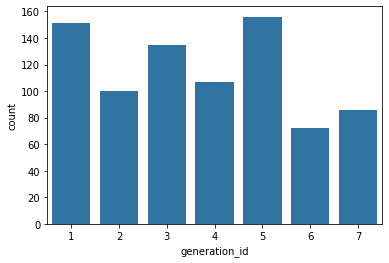

In [6]:
# un-ordered solution
sb.countplot(data = pokemon, x = 'generation_id', color = base_color);

In [7]:
gen_order = pokemon['generation_id'].value_counts().index
gen_order

Int64Index([5, 1, 3, 4, 2, 7, 6], dtype='int64')

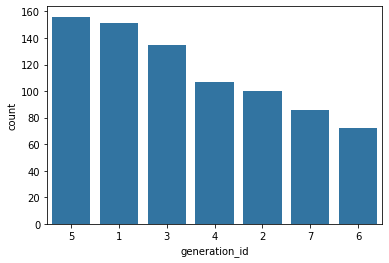

In [8]:
# ordered solution
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = gen_order);

### Expected Output: TO DO Task 1

Once you've created your chart, run the cell below to check the output from our solution. **Your visualization does not need to be exactly the same as ours, but it should be able to come up with the same conclusions.**

I used seaborn's countplot function to generate this chart. I also added an additional argument so that each bar has the same color.


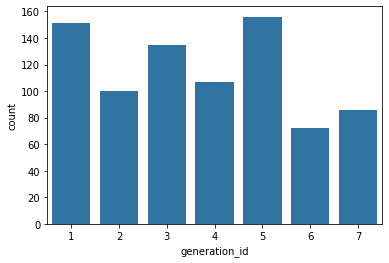

In [9]:
# The function below has been defined in the `solutions_univ.py` file, that you can refer only when necessary. 
# This function contains the expected solution. 
bar_chart_solution_1()

### **TO DO Task 2** 
1. Each Pokémon species has either `type_1`, `type_2` or both `types` that play a part in its offensive and defensive capabilities. The code below creates a new dataframe `pkmn_types` that club the rows of both `type_1` and `type_2`, so that the resulting dataframe has **new** column, `type_level`. 

**Display, how frequent is each type?**



The function below will do the following in the pokemon dataframe *out of place*:
1. Select the 'id', and 'species' columns from pokemon. 
2. Remove the 'type_1', 'type_2' columns from pokemon
3. Add a new column 'type_level' that can have a value either 'type_1' or 'type_2'
4. Add another column 'type' that will contain the actual value contained in the 'type_1', 'type_2' columns. For example, the first row in the pokemon dataframe having `id=1`	and `species=bulbasaur` will now occur twice in the resulting dataframe after the `melt()` operation. The first occurrence will have `type=grass`, whereas, the second occurrence will have `type=poison`.

In [10]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


In [11]:
type_counts = pkmn_types['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [12]:
type_order = pkmn_types['type'].value_counts().index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'fire', 'ground', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

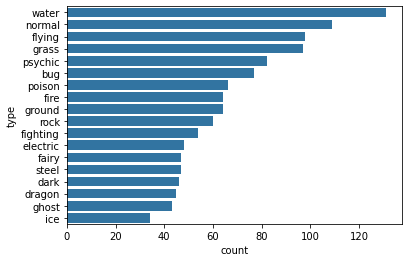

In [13]:
# YOUR CODE HERE
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

2. Your task is to use this dataframe to create a _relative frequency_ plot of the proportion of Pokémon with each type, _sorted_ from most frequent to least. **Hint**: The sum across bars should be greater than 100%, since many Pokémon have two types. Keep this in mind when considering a denominator to compute relative frequencies.

In [14]:
# YOUR CODE HERE
# Step 1. Find the maximum proportion of bar
n_pokemon = pkmn_types['type'].value_counts().sum()
n_pokemon

1212

In [15]:
# Return the highest frequency in the `type` column
max_type_count = type_counts[0]
max_type_count

131

In [16]:
# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon
max_prop

0.10808580858085809

In [17]:
# Step 2. Create an array of evenly spaced proportioned values
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2%
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

In [18]:
#  Step 3. Create a list of String values that can be used as tick labels.
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

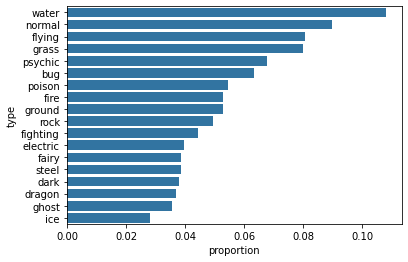

In [19]:
# Step 4. Plot the bar chart, with new x-tick labels
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);
# Change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

### Expected Output: TO DO Task 2

I created a horizontal bar chart since there are a lot of Pokemon types. The unique() method was used to get the number of different Pokemon species. I also added an xlabel call to make sure it was clear the bar length represents a relative frequency.


The frequency of each type is:
 type_1    807
type_2    405
Name: type_level, dtype: int64


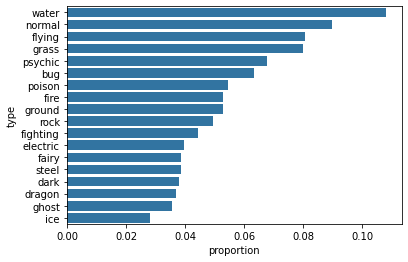

In [20]:
# The function below has been defined in the `solutions_univ.py` file, that you can refer only when necessary. 
# This function contains the expected solution. 
bar_chart_solution_2()

If you're interested in seeing the code used to generate the solution plots, you can find it in the `solutions_univ.py` script in the workspace folder. You can navigate there by clicking on the Jupyter icon in the upper left corner of the workspace. Spoiler warning: the script contains solutions for all of the workspace exercises in this lesson, so take care not to spoil your practice!